# Proyecto Análisis de Tendencias en Redes Sociales

## Equipo 2:

### Camila

### Alonso

### Cristofer

### Recolección de datos

In [1]:
# Conexión con google drive para la recolección de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Intalación de librerias
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install spacy
!pip install seaborn
!python -m spacy download es_core_news_sm
!pip install nltk
!pip install json
!pip install wordcloud
!pip install deep_translator
!pip install googletrans==4.0.0-rc1
!pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 71.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━

In [3]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:
#Cargar datos necesarios para nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Leer archivos .json
DFFB = pd.read_json('/content/drive/MyDrive/Proyecto/facebook_data.json', lines=False)
DFIN = pd.read_json('/content/drive/MyDrive/Proyecto/instagram_data.json', lines=False)
DFX = pd.read_json('/content/drive/MyDrive/Proyecto/twitter_data.json', lines=False)

### Preprocesamiento de datos

In [6]:
# Preprocesamiento de datos: Tokenización, Lematización, Eliminación de StopWords y Normalización de textos
# ---------------------Usando la base de datos de Facebook--------------------
# Importar Bibliotecas Necesarias
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#-----------------Recursos necesarios para aplicar el preprocesamiento en español del texto-----------------
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

#------------Aplicar una limpieza de los datos-----------------
#Crear una funcion para limpiar datos

def limpiar_datos(texto):
  """
  Normalizacion del texto: conversión minusculas y eliminar carcateres especiales.
  """
  # Eliminar caracteres especiales y conversión a minúsculas
  texto = texto.lower()                                    #Convierto a minúsculas
  texto = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', texto)  #Elimino caracteres especiales
  texto = re.sub(r'[^\w\s+]', ' ', texto)                  #Elimino signos de puntuación
  texto = re.sub(r'\d+', ' ', texto)                       #Elimino números
  # texto = re.sub(r'\s+', ' ', texto)                     #Elimino espacios en blanco
  texto = texto.strip()                                    #Elimino espacios en blanco al inicio y al final del texto extras
  return texto

#---------Aplicación del Preprocesamiento de datos-----------------

def preprocesamiento_datos(texto):
  """
  Función para aplicar el preprocesamiento de datos, tokenización, lematización, eliminación de stopwords y normalización de textos.
  """
  # Aplicar la función de limpieza de datos
  texto = limpiar_datos(texto)

  # Tokenización
  tokens = word_tokenize(texto, language='spanish')

  # Eliminar stopwords en español
  stop_words = set(stopwords.words('spanish'))
  tokens_sin_stop = [word for word in tokens if word not in stop_words]

  # Lematización con spaCy
  doc = nlp(' '.join(tokens_sin_stop))
  tokens_lematizados = [token.lemma_ for token in doc]

  # Unir los tokens procesados
  texto_procesado = ' '.join(tokens_lematizados)

  return texto_procesado

#----------Pruebas con textos en español--------
texto = DFFB['contenido'].to_string()

# Aplicar procesamiento
DFFB['Texto_Procesado'] = DFFB['contenido'].apply(preprocesamiento_datos)
# print("Texto original: \n", texto)
# print("Texto procesado: ", texto_procesado)

# print(FB['Texto_Procesado'],FB['contenido'])
print(DFFB)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      id     usuario       fecha  \
0      1    usuario1  2025-09-19   
1      2    usuario2  2025-09-05   
2      3    usuario3  2025-03-13   
3      4    usuario4  2025-07-28   
4      5    usuario5  2025-05-14   
..   ...         ...         ...   
895  896  usuario896  2025-01-22   
896  897  usuario897  2025-04-21   
897  898  usuario898  2025-10-29   
898  899  usuario899  2025-08-30   
899  900  usuario900  2025-08-13   

                                             contenido  likes  comentarios  \
0    Una experiencia maravillosa, muy satisfecho. #...     79           87   
1            El peor servicio que he recibido. #colera    341           98   
2    Este servicio es excelente, estoy muy satisfec...    144           25   
3     No puedo creer lo mal que funciona esto. #colera    366           41   
4         Esto es increible, estoy extasiado! #extasis    451            4   
..                                                 ...    ...          ...   
895       Esto es inc

In [7]:
DFFB

,id,usuario,fecha,contenido,likes,comentarios,compartidos,Texto_Procesado
0,1,usuario1,2025-09-19,"Una experiencia maravillosa, muy satisfecho. #...",79,87,26,experiencia maravilloso satisfecho satisfaccion
1,2,usuario2,2025-09-05,El peor servicio que he recibido. #colera,341,98,7,peor servicio recibido colera
2,3,usuario3,2025-03-13,"Este servicio es excelente, estoy muy satisfec...",144,25,41,servicio excelente satisfecho satisfaccion
3,4,usuario4,2025-07-28,No puedo creer lo mal que funciona esto. #colera,366,41,37,poder creer mal función colera
4,5,usuario5,2025-05-14,"Esto es increible, estoy extasiado! #extasis",451,4,31,increible extasiado extasis
...,...,...,...,...,...,...,...,...
895,896,usuario896,2025-01-22,"Esto es increible, estoy extasiado! #extasis",431,42,10,increible extasiado extasis
896,897,usuario897,2025-04-21,"Esto es increible, estoy extasiado! #extasis",466,89,0,increible extasiado extasis
897,898,usuario898,2025-10-29,Es frustrante que no funcione como esperaba. #...,332,28,6,frustrante funcione esperar frustracion
898,899,usuario899,2025-08-30,"No volvere a comprar aqui, muy decepcionado. #...",260,89,17,volverir comprar aqui decepcionado decepcion


In [8]:
# Preprocesamiento de datos: Tokenización, Lematización, Eliminación de StopWords y Normalización de textos
# ---------------------Usando la base de datos de Intagram--------------------
# Importar Bibliotecas Necesarias
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#-----------------Recursos necesarios para aplicar el preprocesamiento en español del texto-----------------
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

#------------Aplicar una limpieza de los datos-----------------
#Crear una funcion para limpiar datos

def limpiar_datos(texto):
  """
  Normalizacion del texto: conversión minusculas y eliminar carcateres especiales.
  """
  # Eliminar caracteres especiales y conversión a minúsculas
  texto = texto.lower()                                    #Convierto a minúsculas
  texto = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', texto)  #Elimino caracteres especiales
  texto = re.sub(r'[^\w\s+]', ' ', texto)                  #Elimino signos de puntuación
  texto = re.sub(r'\d+', ' ', texto)                       #Elimino números
  # texto = re.sub(r'\s+', ' ', texto)                     #Elimino espacios en blanco
  texto = texto.strip()                                    #Elimino espacios en blanco al inicio y al final del texto extras
  return texto

#---------Aplicación del Preprocesamiento de datos-----------------

def preprocesamiento_datos(texto):
  """
  Función para aplicar el preprocesamiento de datos, tokenización, lematización, eliminación de stopwords y normalización de textos.
  """
  # Aplicar la función de limpieza de datos
  texto = limpiar_datos(texto)

  # Tokenización
  tokens = word_tokenize(texto, language='spanish')

  # Eliminar stopwords en español
  stop_words = set(stopwords.words('spanish'))
  tokens_sin_stop = [word for word in tokens if word not in stop_words]

  # Lematización con spaCy
  doc = nlp(' '.join(tokens_sin_stop))
  tokens_lematizados = [token.lemma_ for token in doc]

  # Unir los tokens procesados
  texto_procesado = ' '.join(tokens_lematizados)

  return texto_procesado

#----------Pruebas con textos en español--------
texto = DFIN['contenido'].to_string()

# Aplicar procesamiento
DFIN['Texto_Procesado'] = DFIN['contenido'].apply(preprocesamiento_datos)
# print("Texto original: \n", texto)
# print("Texto procesado: ", texto_procesado)

# print(FB['Texto_Procesado'],FB['contenido'])
print(DFIN)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      id     usuario       fecha  \
0      1    usuario1  2025-02-27   
1      2    usuario2  2025-12-02   
2      3    usuario3  2025-07-05   
3      4    usuario4  2025-07-31   
4      5    usuario5  2025-09-15   
..   ...         ...         ...   
895  896  usuario896  2025-07-28   
896  897  usuario897  2025-11-20   
897  898  usuario898  2025-07-31   
898  899  usuario899  2025-09-06   
899  900  usuario900  2025-07-12   

                                             contenido  likes  comentarios  \
0          Estoy muy feliz con este producto! #alegria    498           97   
1    Una experiencia maravillosa, muy satisfecho. #...     88           41   
2     No puedo creer lo mal que funciona esto. #colera    380          143   
3     No puedo creer lo mal que funciona esto. #colera    588           40   
4    Me siento decepcionado con la calidad. #decepcion    253          175   
..                                                 ...    ...          ...   
895       Esto es inc

In [9]:
DFIN

,id,usuario,fecha,contenido,likes,comentarios,Texto_Procesado
0,1,usuario1,2025-02-27,Estoy muy feliz con este producto! #alegria,498,97,feliz producto alegrio
1,2,usuario2,2025-12-02,"Una experiencia maravillosa, muy satisfecho. #...",88,41,experiencia maravilloso satisfecho satisfaccion
2,3,usuario3,2025-07-05,No puedo creer lo mal que funciona esto. #colera,380,143,poder creer mal función colera
3,4,usuario4,2025-07-31,No puedo creer lo mal que funciona esto. #colera,588,40,poder creer mal función colera
4,5,usuario5,2025-09-15,Me siento decepcionado con la calidad. #decepcion,253,175,sentir decepcionado calidad decepcion
...,...,...,...,...,...,...,...
895,896,usuario896,2025-07-28,"Esto es increible, estoy extasiado! #extasis",1000,140,increible extasiado extasis
896,897,usuario897,2025-11-20,Estoy muy feliz con este producto! #alegria,69,13,feliz producto alegrio
897,898,usuario898,2025-07-31,Me siento decepcionado con la calidad. #decepcion,825,132,sentir decepcionado calidad decepcion
898,899,usuario899,2025-09-06,"Un producto realmente bueno, supero mis expect...",632,65,producto realmente bueno supero expectativa al...


In [10]:
# Preprocesamiento de datos: Tokenización, Lematización, Eliminación de StopWords y Normalización de textos
# ---------------------Usando la base de datos de Facebook--------------------
# Importar Bibliotecas Necesarias
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#-----------------Recursos necesarios para aplicar el preprocesamiento en español del texto-----------------
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

#------------Aplicar una limpieza de los datos-----------------
#Crear una funcion para limpiar datos

def limpiar_datos(texto):
  """
  Normalizacion del texto: conversión minusculas y eliminar carcateres especiales.
  """
  # Eliminar caracteres especiales y conversión a minúsculas
  texto = texto.lower()                                    #Convierto a minúsculas
  texto = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', texto)  #Elimino caracteres especiales
  texto = re.sub(r'[^\w\s+]', ' ', texto)                  #Elimino signos de puntuación
  texto = re.sub(r'\d+', ' ', texto)                       #Elimino números
  # texto = re.sub(r'\s+', ' ', texto)                     #Elimino espacios en blanco
  texto = texto.strip()                                    #Elimino espacios en blanco al inicio y al final del texto extras
  return texto

#---------Aplicación del Preprocesamiento de datos-----------------

def preprocesamiento_datos(texto):
  """
  Función para aplicar el preprocesamiento de datos, tokenización, lematización, eliminación de stopwords y normalización de textos.
  """
  # Aplicar la función de limpieza de datos
  texto = limpiar_datos(texto)

  # Tokenización
  tokens = word_tokenize(texto, language='spanish')

  # Eliminar stopwords en español
  stop_words = set(stopwords.words('spanish'))
  tokens_sin_stop = [word for word in tokens if word not in stop_words]

  # Lematización con spaCy
  doc = nlp(' '.join(tokens_sin_stop))
  tokens_lematizados = [token.lemma_ for token in doc]

  # Unir los tokens procesados
  texto_procesado = ' '.join(tokens_lematizados)

  return texto_procesado

#----------Pruebas con textos en español--------
texto = DFX['contenido'].to_string()

# Aplicar procesamiento
DFX['Texto_Procesado'] = DFX['contenido'].apply(preprocesamiento_datos)
# print("Texto original: \n", texto)
# print("Texto procesado: ", texto_procesado)

# print(FB['Texto_Procesado'],FB['contenido'])
print(DFX)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      id      usuario       fecha  \
0      1    @usuario1  2025-07-24   
1      2    @usuario2  2025-05-21   
2      3    @usuario3  2025-08-12   
3      4    @usuario4  2025-08-31   
4      5    @usuario5  2025-03-24   
..   ...          ...         ...   
895  896  @usuario896  2025-09-15   
896  897  @usuario897  2025-10-20   
897  898  @usuario898  2025-05-13   
898  899  @usuario899  2025-06-03   
899  900  @usuario900  2025-05-08   

                                             contenido  retweets  likes  \
0         Esto es increible, estoy extasiado! #extasis       125     78   
1    Una experiencia maravillosa, muy satisfecho. #...        38    113   
2            El peor servicio que he recibido. #colera       177    170   
3    Me siento decepcionado con la calidad. #decepcion        68    126   
4    No volvere a comprar aqui, muy decepcionado. #...       136    275   
..                                                 ...       ...    ...   
895        Estoy muy feliz con

In [11]:
DFX

,id,usuario,fecha,contenido,retweets,likes,respuestas,Texto_Procesado
0,1,@usuario1,2025-07-24,"Esto es increible, estoy extasiado! #extasis",125,78,33,increible extasiado extasis
1,2,@usuario2,2025-05-21,"Una experiencia maravillosa, muy satisfecho. #...",38,113,69,experiencia maravilloso satisfecho satisfaccion
2,3,@usuario3,2025-08-12,El peor servicio que he recibido. #colera,177,170,63,peor servicio recibido colera
3,4,@usuario4,2025-08-31,Me siento decepcionado con la calidad. #decepcion,68,126,30,sentir decepcionado calidad decepcion
4,5,@usuario5,2025-03-24,"No volvere a comprar aqui, muy decepcionado. #...",136,275,35,volverir comprar aqui decepcionado decepcion
...,...,...,...,...,...,...,...,...
895,896,@usuario896,2025-09-15,Estoy muy feliz con este producto! #alegria,116,156,76,feliz producto alegrio
896,897,@usuario897,2025-10-20,"No volvere a comprar aqui, muy decepcionado. #...",33,432,10,volverir comprar aqui decepcionado decepcion
897,898,@usuario898,2025-05-13,Estoy muy feliz con este producto! #alegria,11,38,40,feliz producto alegrio
898,899,@usuario899,2025-06-03,No puedo creer lo mal que funciona esto. #colera,37,246,32,poder creer mal función colera


### Análisis Transitorio

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


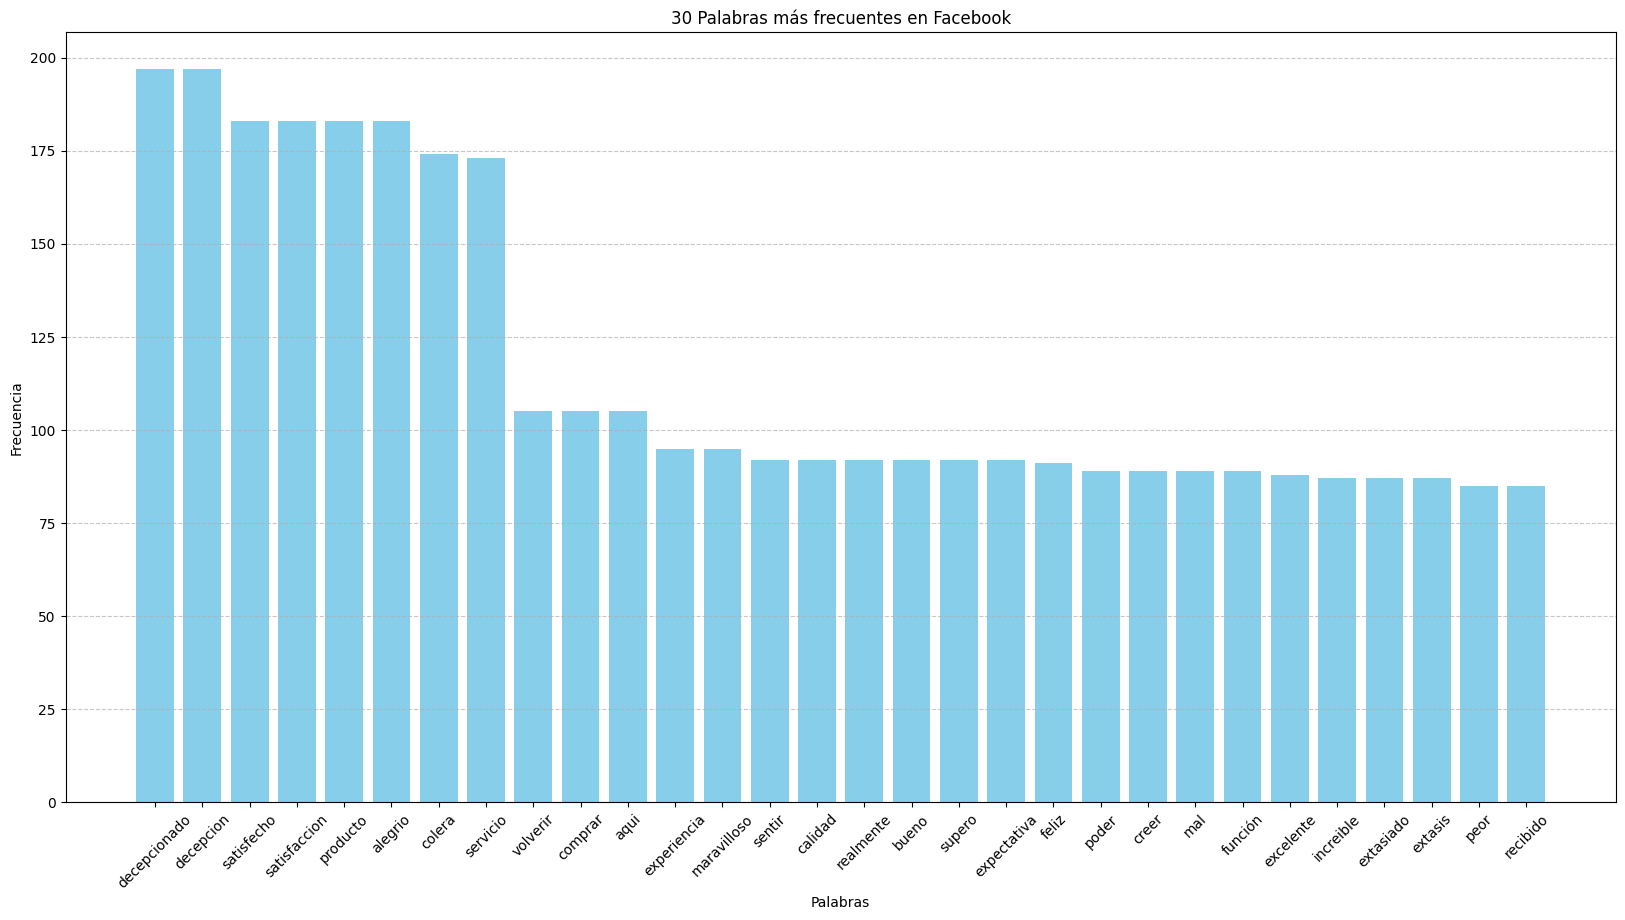

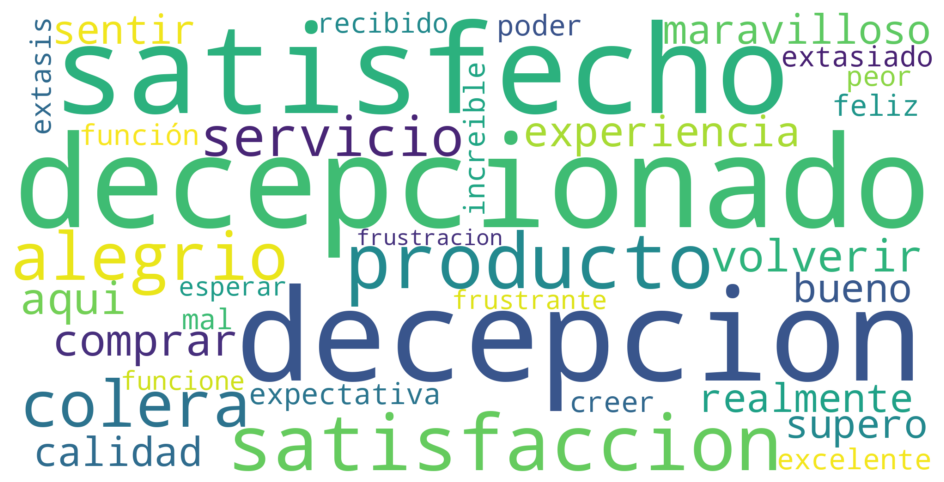

In [12]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Convertir columna a string
texto = " ".join(DFFB['Texto_Procesado'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados_Fb = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados_Fb)

# Tomar solo las 20 palabras más frecuentes
palabras_comunes = frecuencia_palabras.most_common(30)
palabras, frecuencias = zip(*palabras_comunes)

# Visualización de las palabras más frecuentes
plt.figure(figsize=(20, 10))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.title('30 Palabras más frecuentes en Facebook')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis').generate_from_frequencies(frecuencia_palabras)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


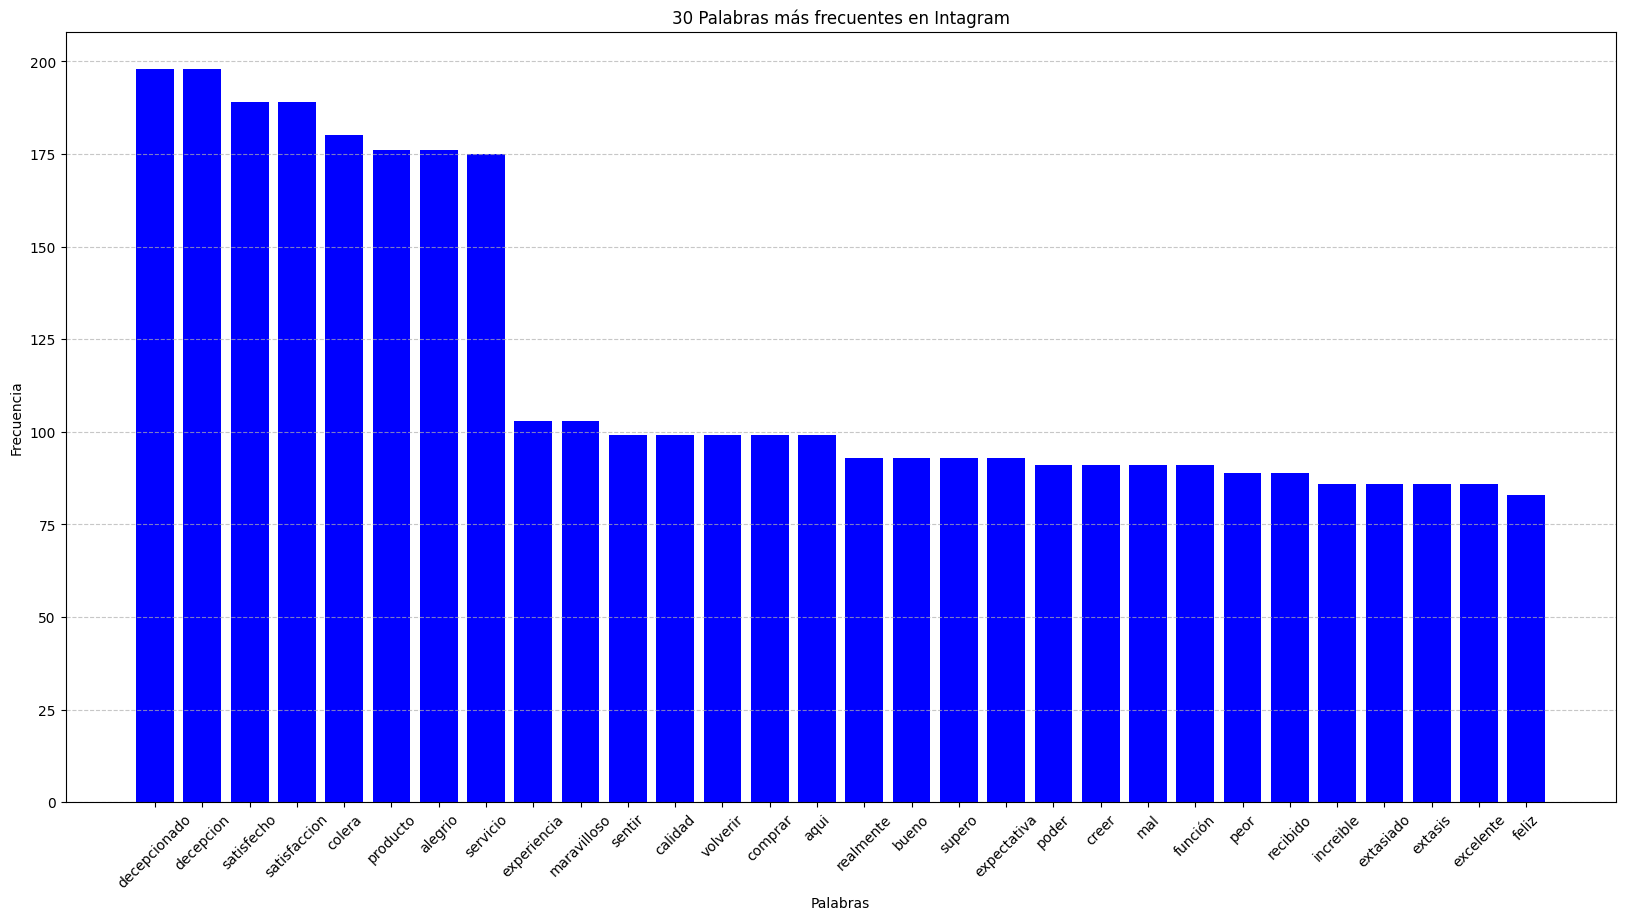

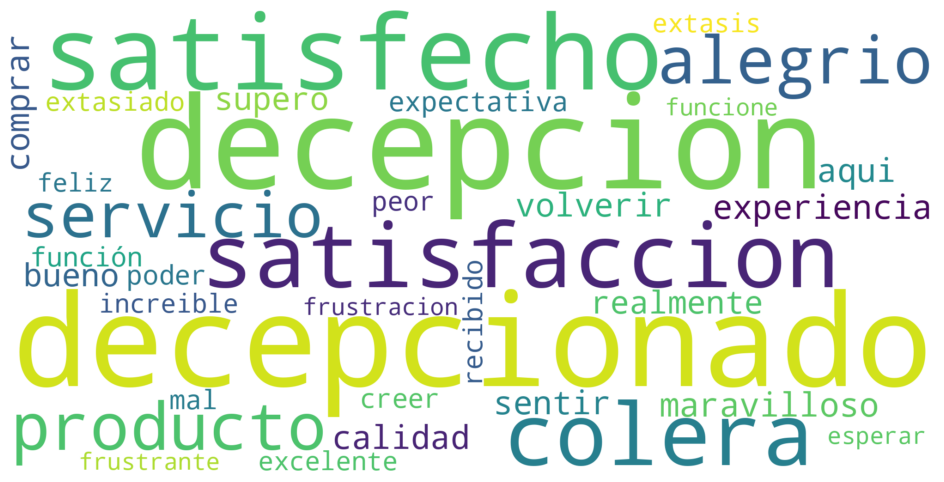

In [13]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Convertir columna a string
texto = " ".join(DFIN['Texto_Procesado'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados_In = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados_In)

# Tomar solo las 20 palabras más frecuentes
palabras_comunes = frecuencia_palabras.most_common(30)
palabras, frecuencias = zip(*palabras_comunes)

# Visualización de las palabras más frecuentes
plt.figure(figsize=(20, 10))
plt.bar(palabras, frecuencias, color='blue')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.title('30 Palabras más frecuentes en Intagram')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis').generate_from_frequencies(frecuencia_palabras)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


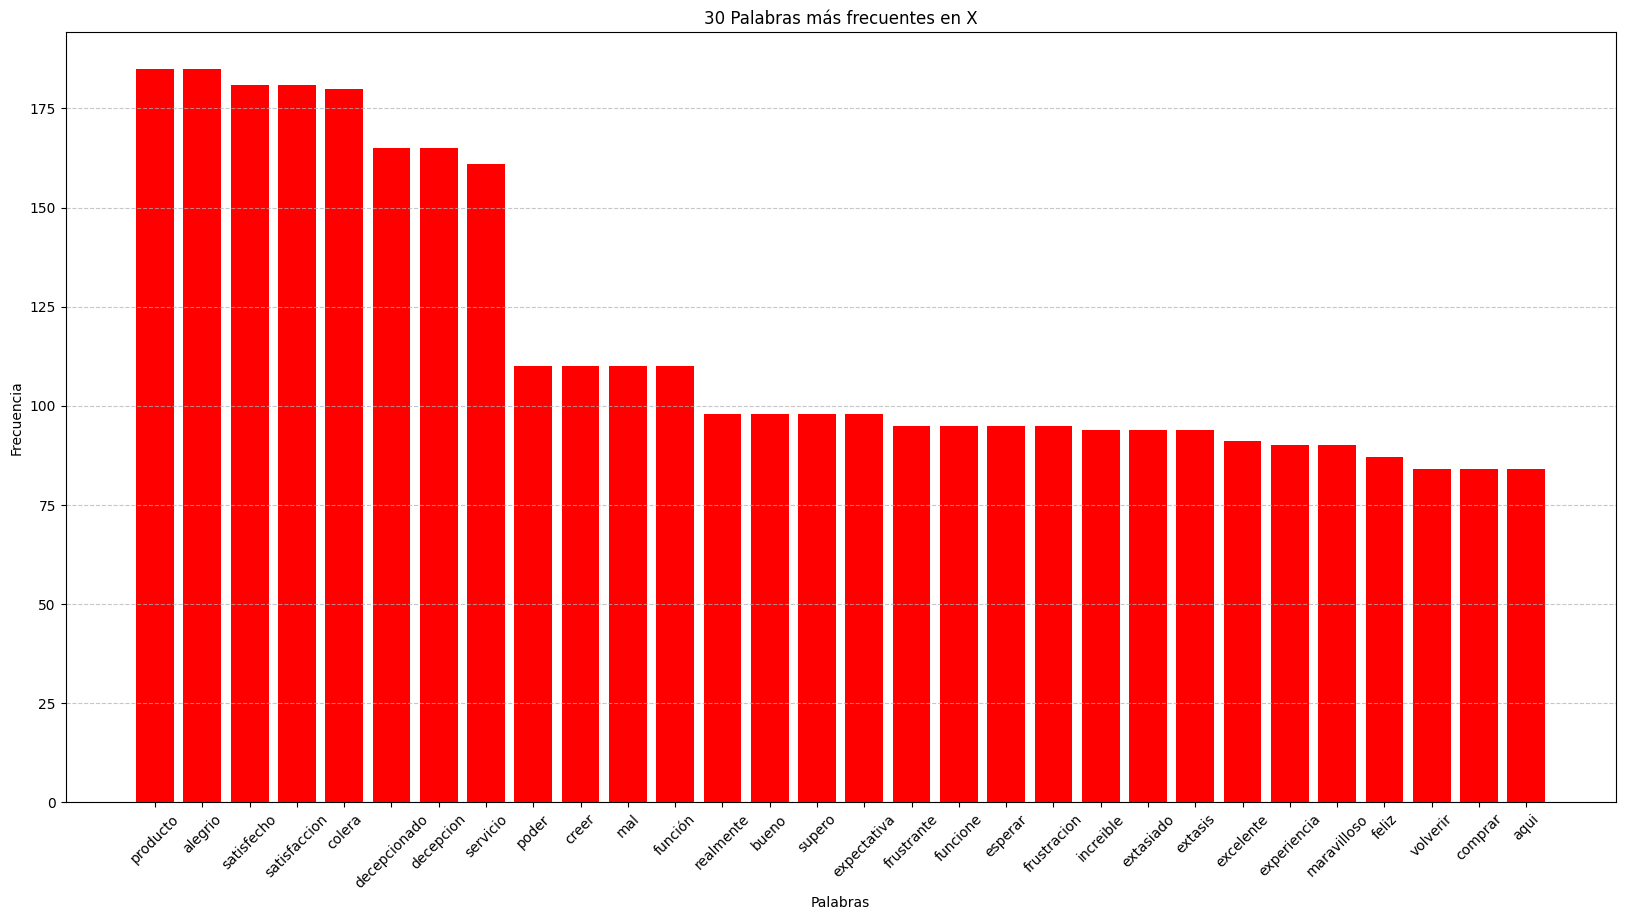

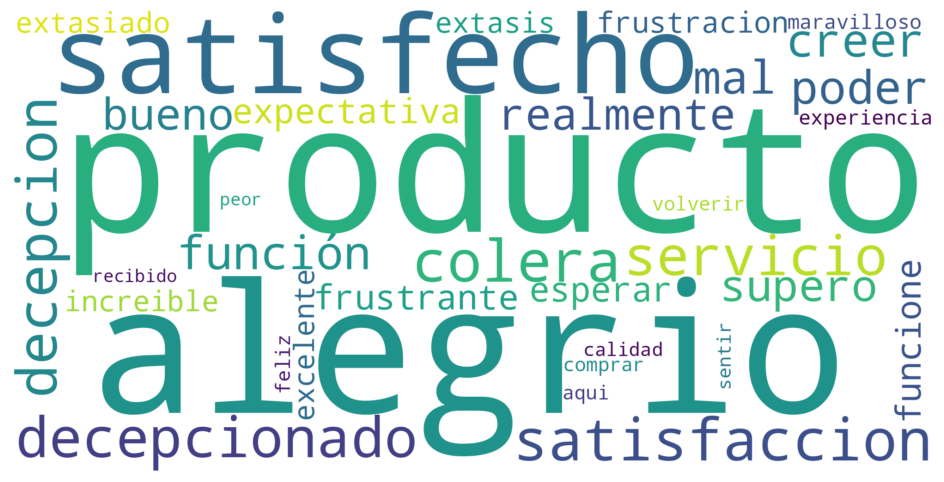

In [14]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Convertir columna a string
texto = " ".join(DFX['Texto_Procesado'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados_X = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados_X)

# Tomar solo las 20 palabras más frecuentes
palabras_comunes = frecuencia_palabras.most_common(30)
palabras, frecuencias = zip(*palabras_comunes)

# Visualización de las palabras más frecuentes
plt.figure(figsize=(20, 10))
plt.bar(palabras, frecuencias, color='red')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.title('30 Palabras más frecuentes en X')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=2000, height=1000, background_color='white', colormap='viridis').generate_from_frequencies(frecuencia_palabras)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

### N-gramas

['experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'peor', 'servicio', 'recibido', 'colera', 'servicio', 'excelente', 'satisfecho', 'satisfaccion', 'poder', 'creer', 'mal', 'función', 'colera', 'increible', 'extasiado', 'extasis', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'frustrante', 'funcione', 'esperar', 'frustracion', 'peor', 'servicio', 'recibido', 'colera', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'increible', 'extasiado', 'extasis', 'producto', 'realmente', 'bueno', 'supero', 'expectativa', 'alegrio', 'peor', 'servicio', 'recibido', 'colera', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'poder', 'creer', 'mal', 'función', 'colera', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'poder', 'creer', 'mal', 'función', 'colera', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'servicio', 'excelente', 'satisfecho', 'satisfaccion', 'peor', 'servicio',

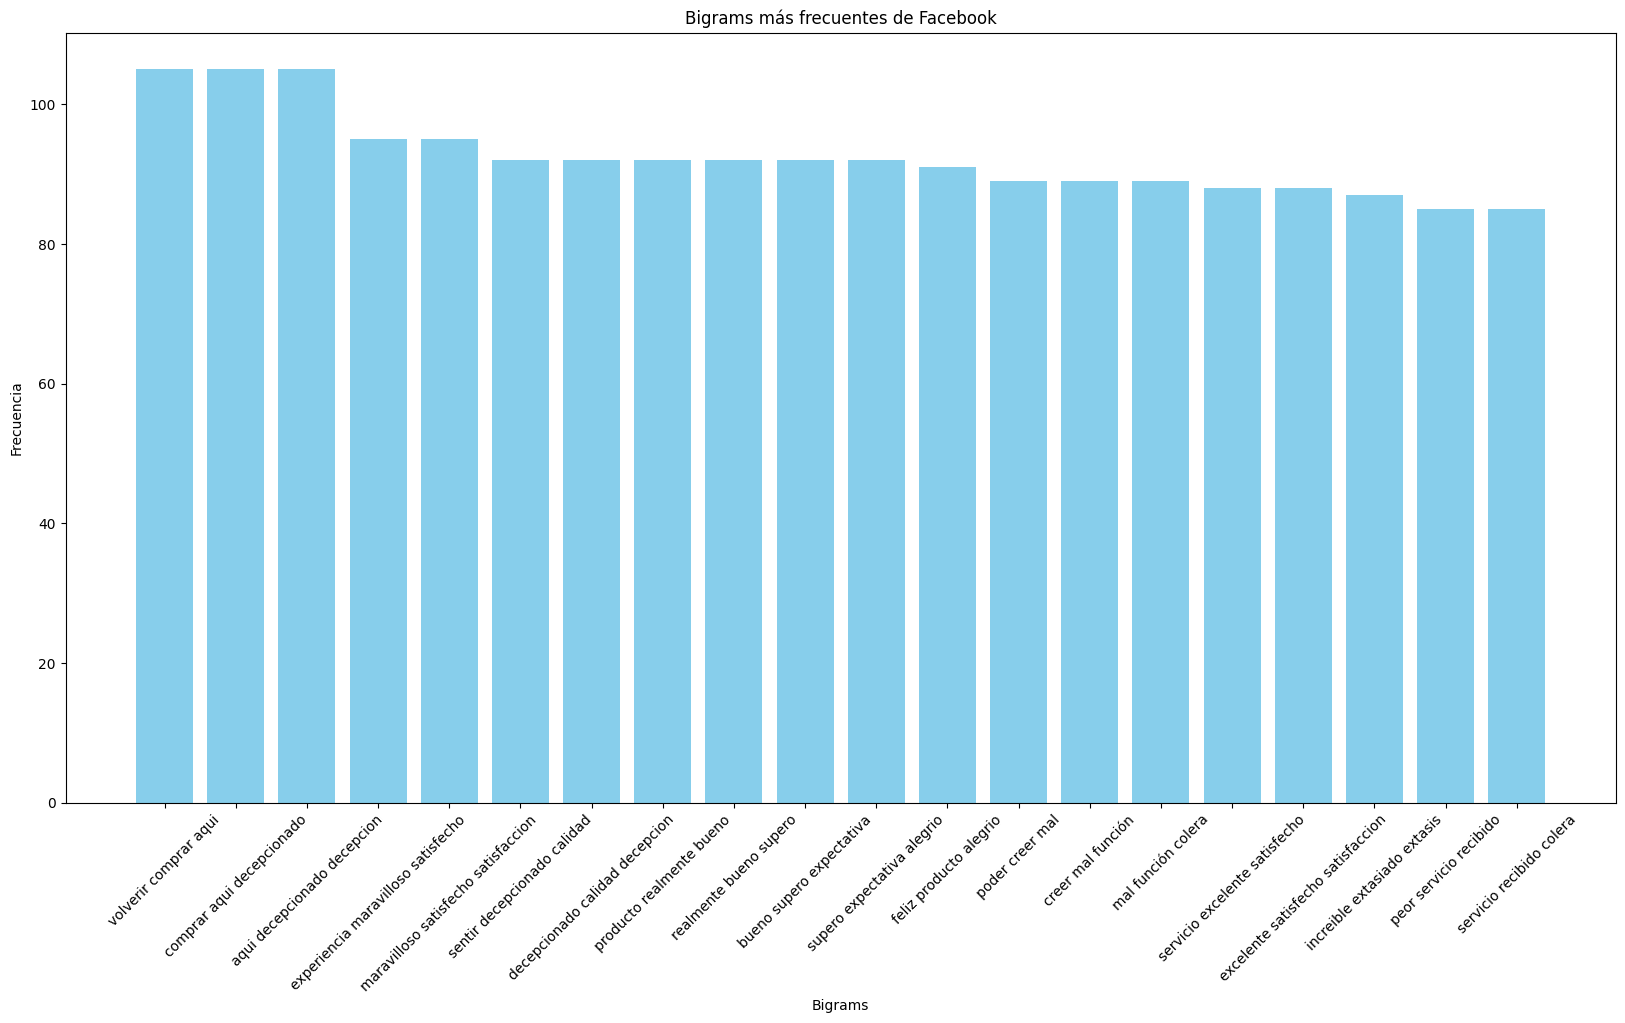

In [15]:
from nltk.util import ngrams

print(tokens_filtrados_Fb)

# Crear bigramas (n-gramas de 2 palabras)
bigrams = list(ngrams(tokens_filtrados_Fb, 3))

# Contar la frecuencia de los bigramas
frecuencia_bigrams = Counter(bigrams)

# Visualización de los bigramas más frecuentes
bigrams_mas_frecuentes = frecuencia_bigrams.most_common(20)
bigrams_mas_frecuentes = { ' '.join(k): v for k, v in bigrams_mas_frecuentes }

plt.figure(figsize=(20, 10))
plt.bar(bigrams_mas_frecuentes.keys(), bigrams_mas_frecuentes.values(), color = 'skyblue')
plt.title('Bigrams más frecuentes de Facebook')
plt.xlabel('Bigrams')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

['feliz', 'producto', 'alegrio', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'poder', 'creer', 'mal', 'función', 'colera', 'poder', 'creer', 'mal', 'función', 'colera', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'increible', 'extasiado', 'extasis', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'peor', 'servicio', 'recibido', 'colera', 'increible', 'extasiado', 'extasis', 'poder', 'creer', 'mal', 'función', 'colera', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'servicio', 'excelente', 'satisfecho', 'satisfaccion', 'poder', 'creer', 'mal', 'función', 'colera', 'servicio', 'excelente', 'satisfecho', 'satisfaccion', 'poder', 'creer', 'mal', 'función', 'colera', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'frustrante', 'funcione', 'esperar', 'frustracion', 'servicio', 'excelente', 'satisfecho', 'satisfaccion', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'fru

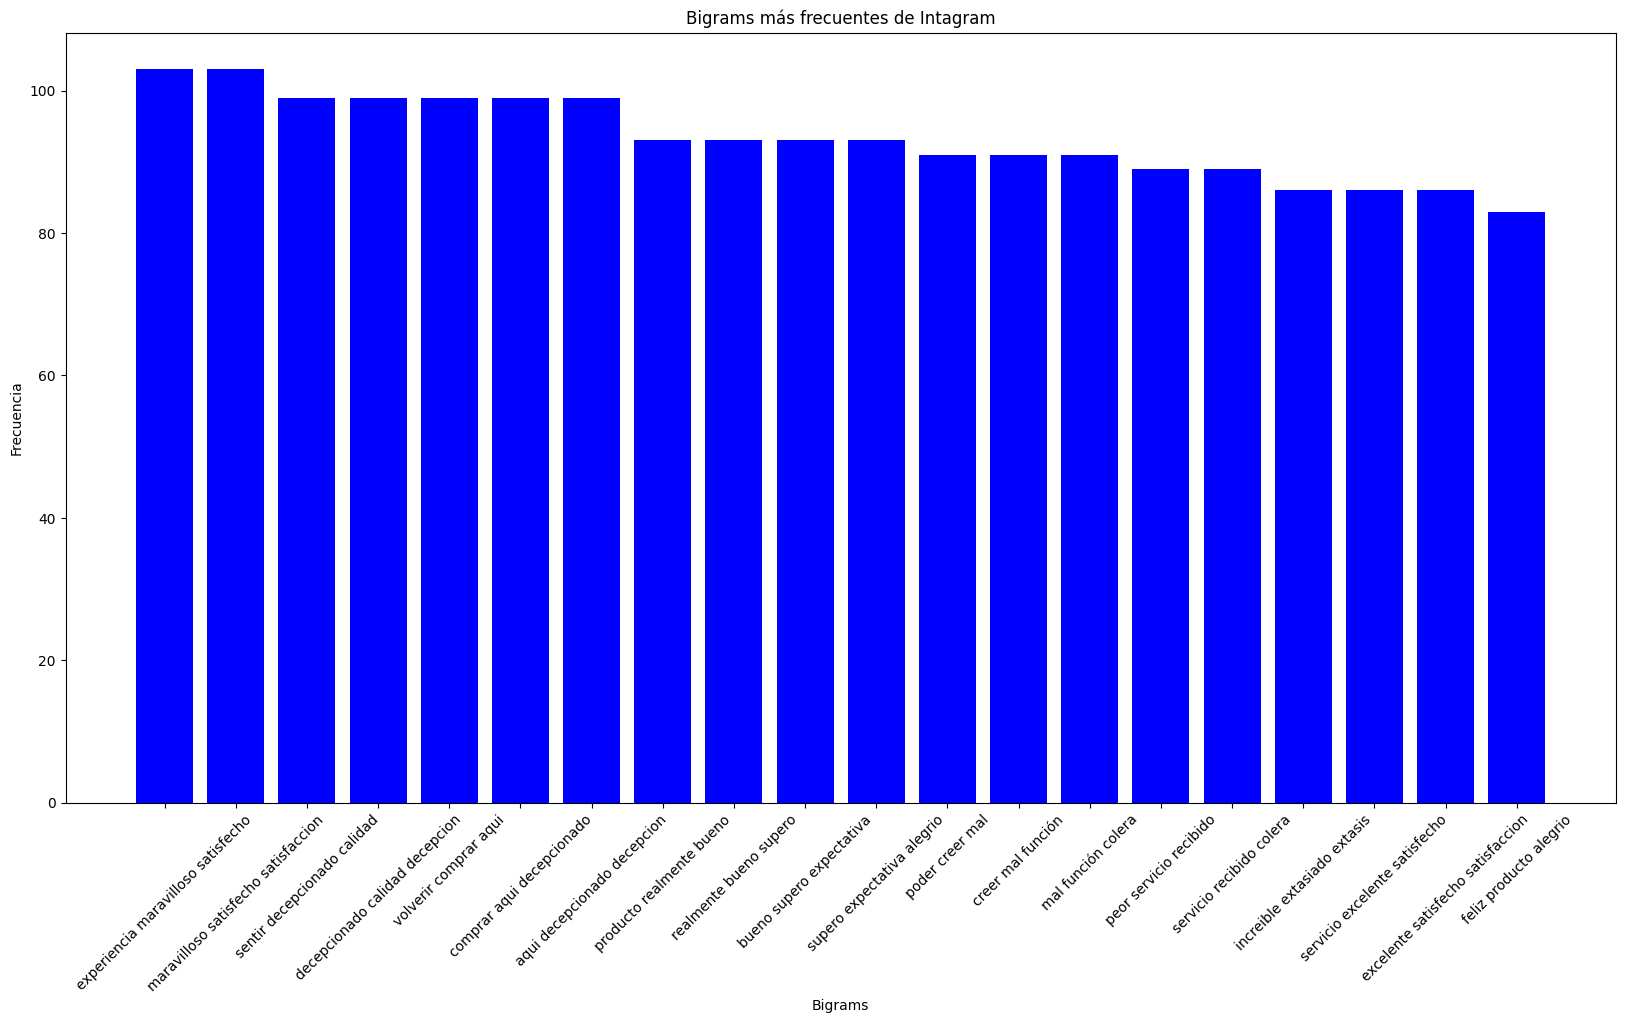

In [16]:
from nltk.util import ngrams

print(tokens_filtrados_In)

# Crear bigramas (n-gramas de 2 palabras)
bigrams = list(ngrams(tokens_filtrados_In, 3))

# Contar la frecuencia de los bigramas
frecuencia_bigrams = Counter(bigrams)

# Visualización de los bigramas más frecuentes
bigrams_mas_frecuentes = frecuencia_bigrams.most_common(20)
bigrams_mas_frecuentes = { ' '.join(k): v for k, v in bigrams_mas_frecuentes }

plt.figure(figsize=(20, 10))
plt.bar(bigrams_mas_frecuentes.keys(), bigrams_mas_frecuentes.values(), color = 'blue')
plt.title('Bigrams más frecuentes de Intagram')
plt.xlabel('Bigrams')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

['increible', 'extasiado', 'extasis', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'peor', 'servicio', 'recibido', 'colera', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'feliz', 'producto', 'alegrio', 'peor', 'servicio', 'recibido', 'colera', 'increible', 'extasiado', 'extasis', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'producto', 'realmente', 'bueno', 'supero', 'expectativa', 'alegrio', 'experiencia', 'maravilloso', 'satisfecho', 'satisfaccion', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'increible', 'extasiado', 'extasis', 'increible', 'extasiado', 'extasis', 'frustrante', 'funcione', 'esperar', 'frustracion', 'increible', 'extasiado', 'extasis', 'poder', 'creer', 'mal', 'función', 'colera', 'sentir', 'decepcionado', 'calidad', 'decepcion', 'volverir', 'comprar', 'aqui', 'decepcionado', 'decepcion', 'poder', 'creer', 'm

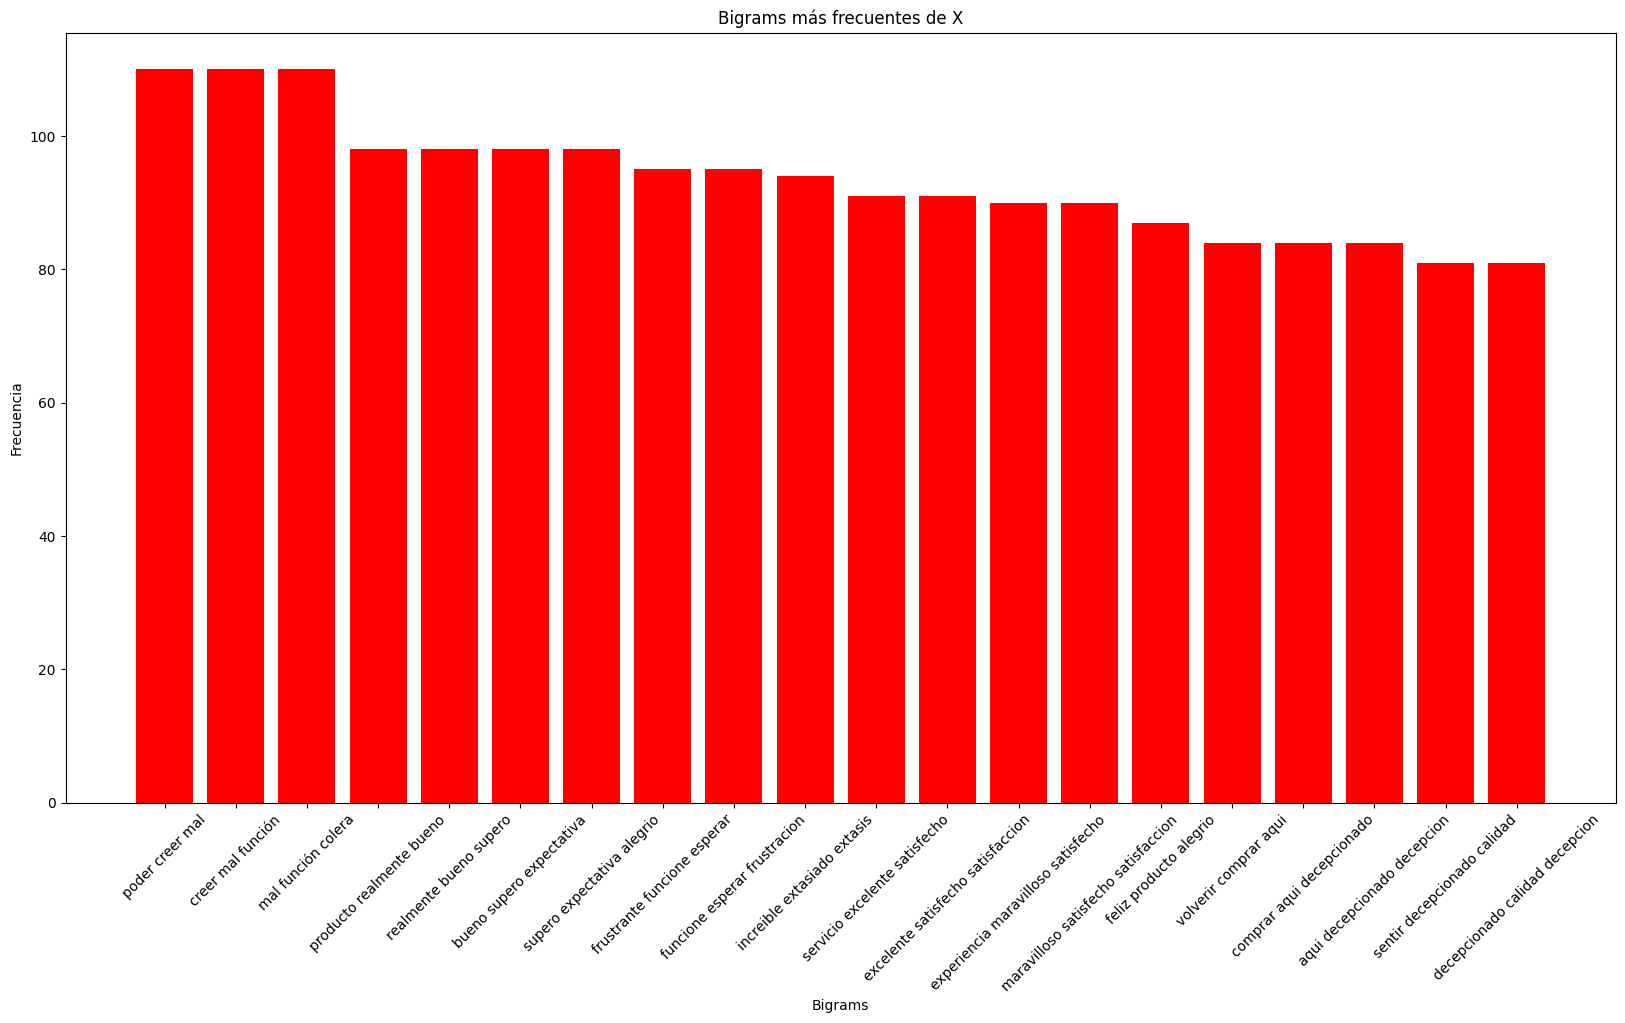

In [17]:
from nltk.util import ngrams

print(tokens_filtrados_X)

# Crear bigramas (n-gramas de 2 palabras)
bigrams = list(ngrams(tokens_filtrados_X, 3))

# Contar la frecuencia de los bigramas
frecuencia_bigrams = Counter(bigrams)

# Visualización de los bigramas más frecuentes
bigrams_mas_frecuentes = frecuencia_bigrams.most_common(20)
bigrams_mas_frecuentes = { ' '.join(k): v for k, v in bigrams_mas_frecuentes }

plt.figure(figsize=(20, 10))
plt.bar(bigrams_mas_frecuentes.keys(), bigrams_mas_frecuentes.values(), color = 'red')
plt.title('Bigrams más frecuentes de X')
plt.xlabel('Bigrams')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Longitud de documentos y distrinucion de palabras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      id     usuario       fecha  \
0      1    usuario1  2025-09-19   
1      2    usuario2  2025-09-05   
2      3    usuario3  2025-03-13   
3      4    usuario4  2025-07-28   
4      5    usuario5  2025-05-14   
..   ...         ...         ...   
895  896  usuario896  2025-01-22   
896  897  usuario897  2025-04-21   
897  898  usuario898  2025-10-29   
898  899  usuario899  2025-08-30   
899  900  usuario900  2025-08-13   

                                             contenido  likes  comentarios  \
0    Una experiencia maravillosa, muy satisfecho. #...     79           87   
1            El peor servicio que he recibido. #colera    341           98   
2    Este servicio es excelente, estoy muy satisfec...    144           25   
3     No puedo creer lo mal que funciona esto. #colera    366           41   
4         Esto es increible, estoy extasiado! #extasis    451            4   
..                                                 ...    ...          ...   
895       Esto es inc

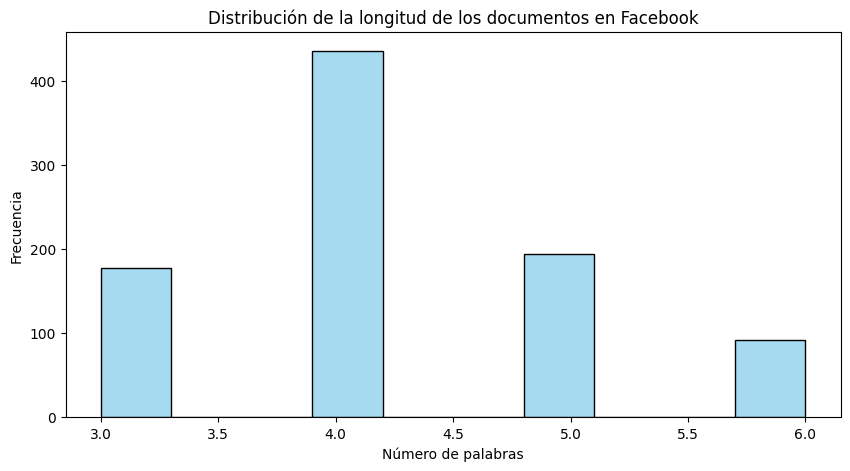

In [18]:
#pip install seaborn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios
nltk.download('punkt')

# Convertir columna a string
textos = " ".join(DFFB['Texto_Procesado'].astype(str))

# Función para calcular la longitud de los documentos
def calcular_longitud(texto):
    tokens = nltk.word_tokenize(texto)
    return len(tokens)

# Crear un DataFrame con las longitudes de los documentos
# df = pd.DataFrame({'texto': [textos]})
DFFB['longitud'] = DFFB['Texto_Procesado'].apply(calcular_longitud)

# Mostrar el DataFrame
print(DFFB)

# Visualización de la distribución de la longitud de los documentos
plt.figure(figsize=(10, 5))
sns.histplot(DFFB['longitud'], bins=10, kde=False, color='skyblue')
plt.title('Distribución de la longitud de los documentos en Facebook')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      id     usuario       fecha  \
0      1    usuario1  2025-02-27   
1      2    usuario2  2025-12-02   
2      3    usuario3  2025-07-05   
3      4    usuario4  2025-07-31   
4      5    usuario5  2025-09-15   
..   ...         ...         ...   
895  896  usuario896  2025-07-28   
896  897  usuario897  2025-11-20   
897  898  usuario898  2025-07-31   
898  899  usuario899  2025-09-06   
899  900  usuario900  2025-07-12   

                                             contenido  likes  comentarios  \
0          Estoy muy feliz con este producto! #alegria    498           97   
1    Una experiencia maravillosa, muy satisfecho. #...     88           41   
2     No puedo creer lo mal que funciona esto. #colera    380          143   
3     No puedo creer lo mal que funciona esto. #colera    588           40   
4    Me siento decepcionado con la calidad. #decepcion    253          175   
..                                                 ...    ...          ...   
895       Esto es inc

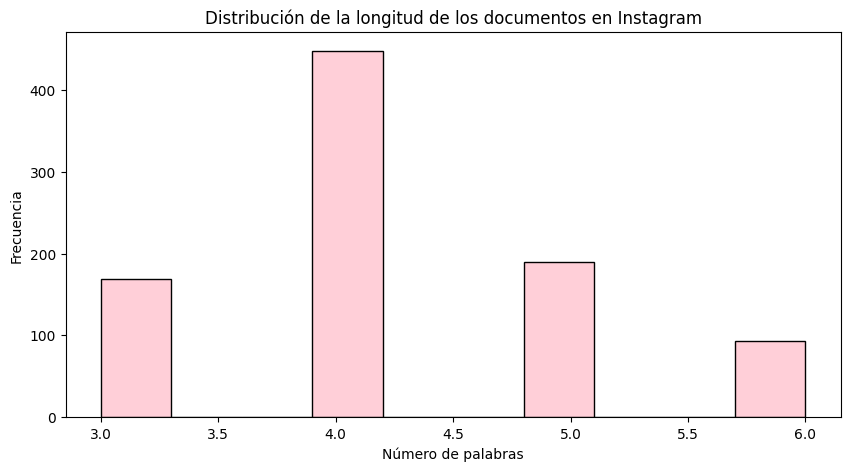

In [19]:
#pip install seaborn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios
nltk.download('punkt')

# Convertir columna a string
textos = " ".join(DFIN['Texto_Procesado'].astype(str))

# Función para calcular la longitud de los documentos
def calcular_longitud(texto):
    tokens = nltk.word_tokenize(texto)
    return len(tokens)

# Crear un DataFrame con las longitudes de los documentos
# df = pd.DataFrame({'texto': [textos]})
DFIN['longitud'] = DFIN['Texto_Procesado'].apply(calcular_longitud)

# Mostrar el DataFrame
print(DFIN)

# Visualización de la distribución de la longitud de los documentos
plt.figure(figsize=(10, 5))
sns.histplot(DFIN['longitud'], bins=10, kde=False, color='pink')
plt.title('Distribución de la longitud de los documentos en Instagram')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      id      usuario       fecha  \
0      1    @usuario1  2025-07-24   
1      2    @usuario2  2025-05-21   
2      3    @usuario3  2025-08-12   
3      4    @usuario4  2025-08-31   
4      5    @usuario5  2025-03-24   
..   ...          ...         ...   
895  896  @usuario896  2025-09-15   
896  897  @usuario897  2025-10-20   
897  898  @usuario898  2025-05-13   
898  899  @usuario899  2025-06-03   
899  900  @usuario900  2025-05-08   

                                             contenido  retweets  likes  \
0         Esto es increible, estoy extasiado! #extasis       125     78   
1    Una experiencia maravillosa, muy satisfecho. #...        38    113   
2            El peor servicio que he recibido. #colera       177    170   
3    Me siento decepcionado con la calidad. #decepcion        68    126   
4    No volvere a comprar aqui, muy decepcionado. #...       136    275   
..                                                 ...       ...    ...   
895        Estoy muy feliz con

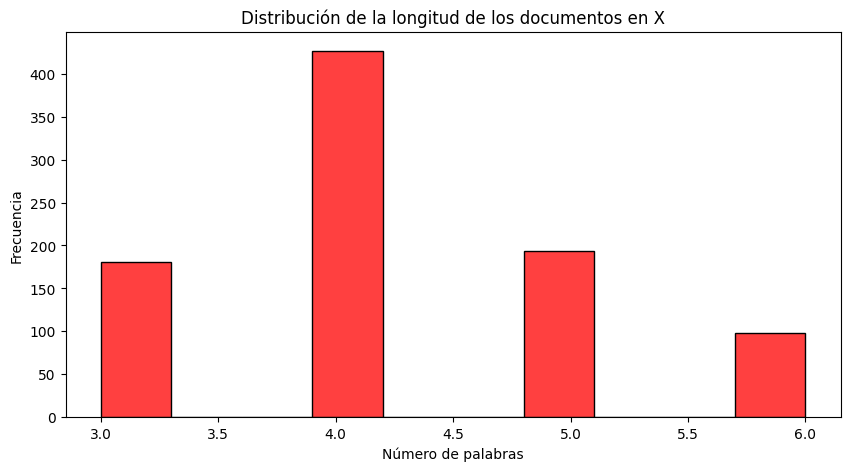

In [20]:
#pip install seaborn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios
nltk.download('punkt')

# Convertir columna a string
textos = " ".join(DFX['Texto_Procesado'].astype(str))

# Función para calcular la longitud de los documentos
def calcular_longitud(texto):
    tokens = nltk.word_tokenize(texto)
    return len(tokens)

# Crear un DataFrame con las longitudes de los documentos
# df = pd.DataFrame({'texto': [textos]})
DFX['longitud'] = DFX['Texto_Procesado'].apply(calcular_longitud)

# Mostrar el DataFrame
print(DFX)

# Visualización de la distribución de la longitud de los documentos
plt.figure(figsize=(10, 5))
sns.histplot(DFX['longitud'], bins=10, kde=False, color = 'red')
plt.title('Distribución de la longitud de los documentos en X')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


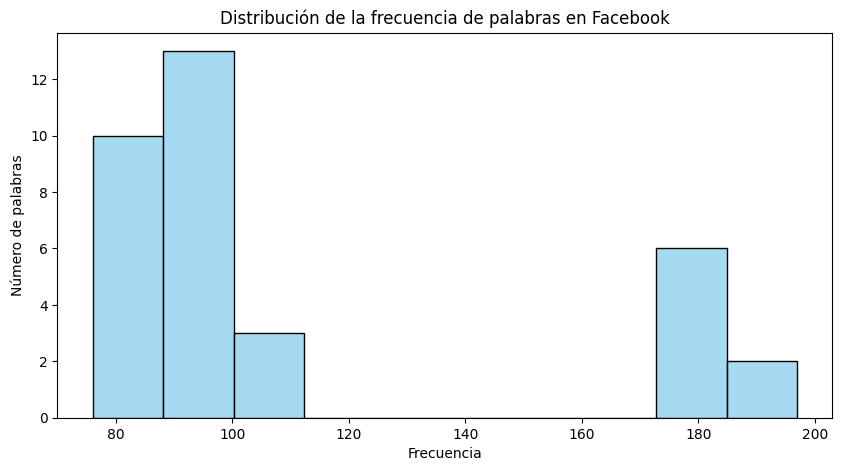

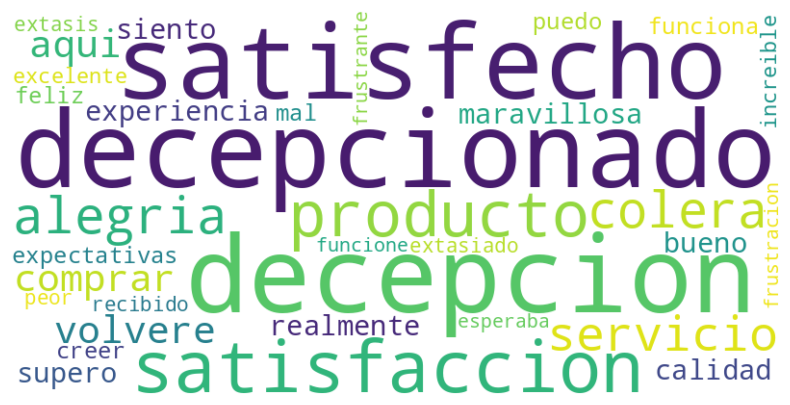

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Texto de ejemplo
texto =  " ".join(DFFB['contenido'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados)

frecuencia_palabras

# Visualización de la distribución de palabras
plt.figure(figsize=(10, 5))
sns.histplot(list(frecuencia_palabras.values()), bins=10, kde=False, color='skyblue')
plt.title('Distribución de la frecuencia de palabras en Facebook')
plt.xlabel('Frecuencia')
plt.ylabel('Número de palabras')
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


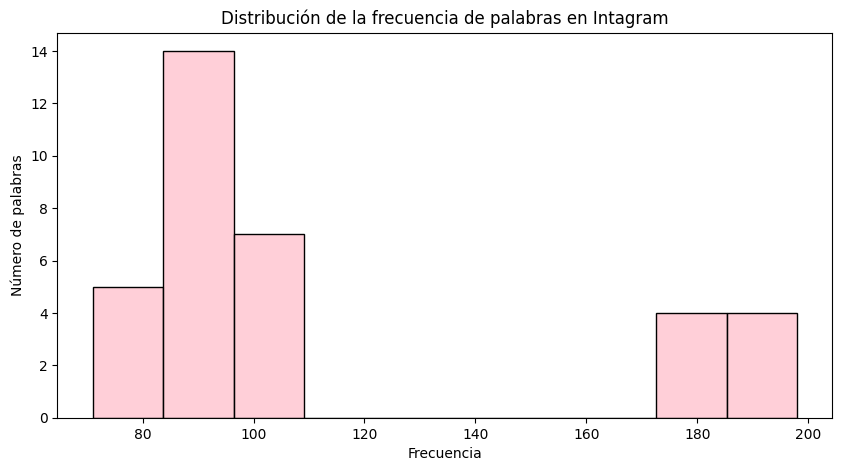

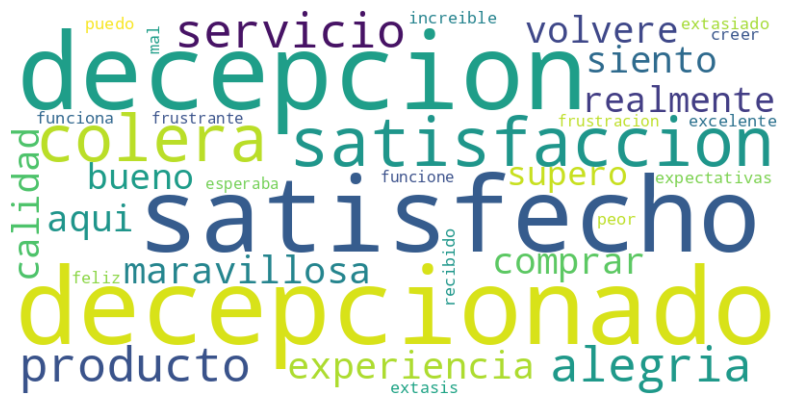

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Texto de ejemplo
texto = " ".join(DFIN['contenido'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados)

frecuencia_palabras

# Visualización de la distribución de palabras
plt.figure(figsize=(10, 5))
sns.histplot(list(frecuencia_palabras.values()), bins=10, kde=False, color='pink')
plt.title('Distribución de la frecuencia de palabras en Intagram')
plt.xlabel('Frecuencia')
plt.ylabel('Número de palabras')
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


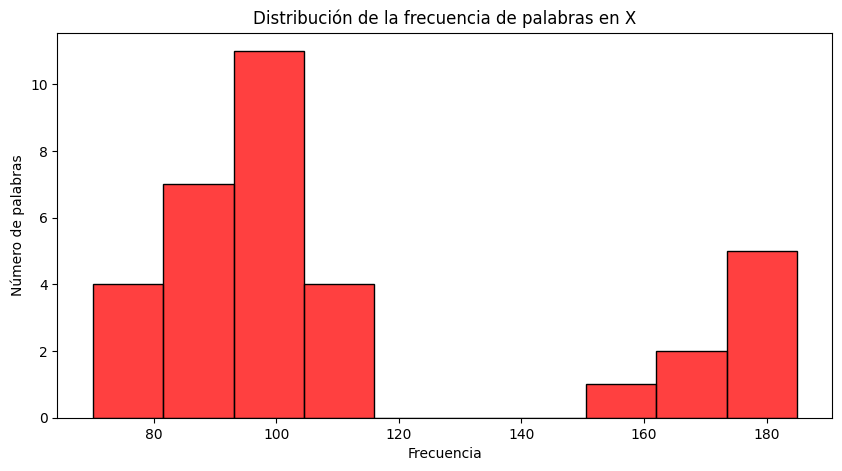

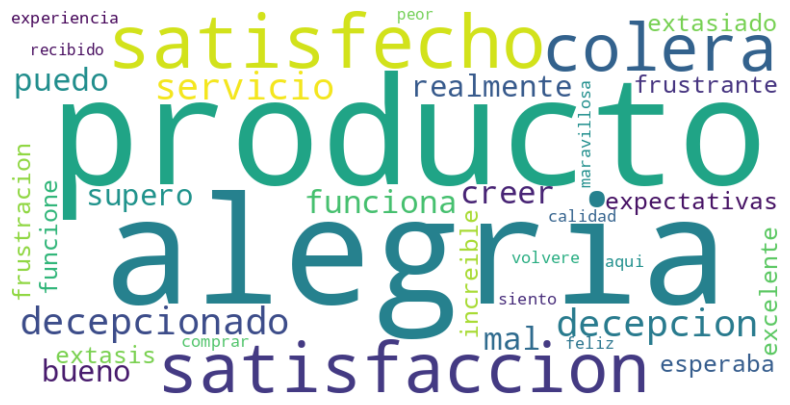

In [23]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Texto de ejemplo
texto = " ".join(DFX['contenido'].astype(str))

# Tokenización
tokens = nltk.word_tokenize(texto.lower())

# Eliminación de stop words
stop_words = set(nltk.corpus.stopwords.words('spanish'))
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_filtrados)

frecuencia_palabras

# Visualización de la distribución de palabras
plt.figure(figsize=(10, 5))
sns.histplot(list(frecuencia_palabras.values()), bins=10, kde=False, color="red")
plt.title('Distribución de la frecuencia de palabras en X')
plt.xlabel('Frecuencia')
plt.ylabel('Número de palabras')
plt.show()

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Análisis de sentimiento

In [24]:
!pip install deep_translator

In [25]:
#---------------- Obtener sentimiento dependiendo del comentario en cada DF------------------
from textblob import TextBlob
from deep_translator import GoogleTranslator

# Función para obtener el sentimiento
def obtener_sentimiento(texto):
    try:
        texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto)
        polaridad = TextBlob(texto_traducido).sentiment.polarity
    except:
        # polaridad = TextBlob(texto).sentiment.polarity
        polaridad = 0
        # return 'Neutral'

    if polaridad > 0:
        return 'Positivo'
    elif polaridad == 0:
        return 'Positivo'
    else:
        return 'Negativo'

# Aplicar la función a la columna 'Texto_Procesado' y crear una nueva columna 'Sentimiento'
# DFFB.drop('Sentimiento', axis=1, inplace=True)
DFFB['Sentimiento'] = DFFB['contenido'].apply(obtener_sentimiento)
DFFB2 = DFFB[['Texto_Procesado','Sentimiento']]
DFFB

,id,usuario,fecha,contenido,likes,comentarios,compartidos,Texto_Procesado,longitud,Sentimiento
0,1,usuario1,2025-09-19,"Una experiencia maravillosa, muy satisfecho. #...",79,87,26,experiencia maravilloso satisfecho satisfaccion,4,Positivo
1,2,usuario2,2025-09-05,El peor servicio que he recibido. #colera,341,98,7,peor servicio recibido colera,4,Negativo
2,3,usuario3,2025-03-13,"Este servicio es excelente, estoy muy satisfec...",144,25,41,servicio excelente satisfecho satisfaccion,4,Positivo
3,4,usuario4,2025-07-28,No puedo creer lo mal que funciona esto. #colera,366,41,37,poder creer mal función colera,5,Negativo
4,5,usuario5,2025-05-14,"Esto es increible, estoy extasiado! #extasis",451,4,31,increible extasiado extasis,3,Positivo
...,...,...,...,...,...,...,...,...,...,...
895,896,usuario896,2025-01-22,"Esto es increible, estoy extasiado! #extasis",431,42,10,increible extasiado extasis,3,Positivo
896,897,usuario897,2025-04-21,"Esto es increible, estoy extasiado! #extasis",466,89,0,increible extasiado extasis,3,Positivo
897,898,usuario898,2025-10-29,Es frustrante que no funcione como esperaba. #...,332,28,6,frustrante funcione esperar frustracion,4,Negativo
898,899,usuario899,2025-08-30,"No volvere a comprar aqui, muy decepcionado. #...",260,89,17,volverir comprar aqui decepcionado decepcion,5,Negativo


In [26]:
DFFB2

,Texto_Procesado,Sentimiento
0,experiencia maravilloso satisfecho satisfaccion,Positivo
1,peor servicio recibido colera,Negativo
2,servicio excelente satisfecho satisfaccion,Positivo
3,poder creer mal función colera,Negativo
4,increible extasiado extasis,Positivo
...,...,...
895,increible extasiado extasis,Positivo
896,increible extasiado extasis,Positivo
897,frustrante funcione esperar frustracion,Negativo
898,volverir comprar aqui decepcionado decepcion,Negativo


In [27]:
# DFFB2.to_csv('/content/drive/MyDrive/Proyecto/FB2.csv', index=False)

In [28]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Textos de ejemplo y sus etiquetas de sentimiento
textos = DFFB2['Texto_Procesado'].astype(str).tolist()
sentimientos = DFFB2['Sentimiento'].astype(str).tolist()

# Preprocesar los textos
def preprocesar_texto(texto):
    doc = nlp(texto)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

textos_procesados = [preprocesar_texto(texto) for texto in textos]

# Vectorizar los textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos_procesados)
y = sentimientos

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       132
    Positivo       1.00      1.00      1.00       138

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Precisión: 1.0


In [29]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimiento
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Textos de ejemplo
textos = DFIN['contenido'].astype(str).tolist()

# Analizar el sentimiento de los textos
resultados = sentiment_analysis(textos)

# Mostrar los resultados
for texto, resultado in zip(textos, resultados):
    print(f"Texto: {texto}")
    print(f"Sentimiento: {resultado['label']} (Score: {resultado['score']:.2f})\n")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Texto: Estoy muy feliz con este producto! #alegria
Sentimiento: 5 stars (Score: 0.77)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.91)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: Me siento decepcionado con la calidad. #decepcion
Sentimiento: 2 stars (Score: 0.50)

Texto: Esto es increible, estoy extasiado! #extasis
Sentimiento: 5 stars (Score: 0.66)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.91)

Texto: El peor servicio que he recibido. #colera
Sentimiento: 1 star (Score: 0.98)

Texto: Esto es increible, estoy extasiado! #extasis
Sentimiento: 5 stars (Score: 0.66)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 st

### Instagram

In [30]:
#---------------- Obtener sentimiento dependiendo del comentario en cada DF------------------
from textblob import TextBlob
from deep_translator import GoogleTranslator

# Función para obtener el sentimiento
def obtener_sentimiento(texto):
    try:
        texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto)
        polaridad = TextBlob(texto_traducido).sentiment.polarity
    except:
        # polaridad = TextBlob(texto).sentiment.polarity
        polaridad = 0
        # return 'Neutral'

    if polaridad > 0:
        return 'Positivo'
    elif polaridad == 0:
        return 'Positivo'
    else:
        return 'Negativo'

# Aplicar la función a la columna 'Texto_Procesado' y crear una nueva columna 'Sentimiento'
# DFFB.drop('Sentimiento', axis=1, inplace=True)
DFIN['Sentimiento'] = DFIN['contenido'].apply(obtener_sentimiento)
DFIN2 = DFIN[['Texto_Procesado','Sentimiento']]
DFIN

,id,usuario,fecha,contenido,likes,comentarios,Texto_Procesado,longitud,Sentimiento
0,1,usuario1,2025-02-27,Estoy muy feliz con este producto! #alegria,498,97,feliz producto alegrio,3,Positivo
1,2,usuario2,2025-12-02,"Una experiencia maravillosa, muy satisfecho. #...",88,41,experiencia maravilloso satisfecho satisfaccion,4,Positivo
2,3,usuario3,2025-07-05,No puedo creer lo mal que funciona esto. #colera,380,143,poder creer mal función colera,5,Negativo
3,4,usuario4,2025-07-31,No puedo creer lo mal que funciona esto. #colera,588,40,poder creer mal función colera,5,Negativo
4,5,usuario5,2025-09-15,Me siento decepcionado con la calidad. #decepcion,253,175,sentir decepcionado calidad decepcion,4,Negativo
...,...,...,...,...,...,...,...,...,...
895,896,usuario896,2025-07-28,"Esto es increible, estoy extasiado! #extasis",1000,140,increible extasiado extasis,3,Positivo
896,897,usuario897,2025-11-20,Estoy muy feliz con este producto! #alegria,69,13,feliz producto alegrio,3,Positivo
897,898,usuario898,2025-07-31,Me siento decepcionado con la calidad. #decepcion,825,132,sentir decepcionado calidad decepcion,4,Negativo
898,899,usuario899,2025-09-06,"Un producto realmente bueno, supero mis expect...",632,65,producto realmente bueno supero expectativa al...,6,Positivo


In [31]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Textos de ejemplo y sus etiquetas de sentimiento
textos = DFIN2['Texto_Procesado'].astype(str).tolist()
sentimientos = DFIN2['Sentimiento'].astype(str).tolist()

# Preprocesar los textos
def preprocesar_texto(texto):
    doc = nlp(texto)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

textos_procesados = [preprocesar_texto(texto) for texto in textos]

# Vectorizar los textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos_procesados)
y = sentimientos

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       124
    Positivo       1.00      1.00      1.00       146

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Precisión: 1.0


In [32]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimiento
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Textos de ejemplo
textos = DFFB['contenido'].astype(str).tolist()

# Analizar el sentimiento de los textos
resultados = sentiment_analysis(textos)

# Mostrar los resultados
for texto, resultado in zip(textos, resultados):
    print(f"Texto: {texto}")
    print(f"Sentimiento: {resultado['label']} (Score: {resultado['score']:.2f})\n")

Device set to use cpu


Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.91)

Texto: El peor servicio que he recibido. #colera
Sentimiento: 1 star (Score: 0.98)

Texto: Este servicio es excelente, estoy muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.78)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: Esto es increible, estoy extasiado! #extasis
Sentimiento: 5 stars (Score: 0.66)

Texto: No volvere a comprar aqui, muy decepcionado. #decepcion
Sentimiento: 1 star (Score: 0.88)

Texto: Me siento decepcionado con la calidad. #decepcion
Sentimiento: 2 stars (Score: 0.50)

Texto: Es frustrante que no funcione como esperaba. #frustracion
Sentimiento: 1 star (Score: 0.72)

Texto: El peor servicio que he recibido. #colera
Sentimiento: 1 star (Score: 0.98)

Texto: No volvere a comprar aqui, muy decepcionado. #decepcion
Sentimiento: 1 star (Score: 0.88)

Texto: Esto es increible, estoy extasiado! #extasis
Sen

### X

In [33]:
#---------------- Obtener sentimiento dependiendo del comentario en cada DF------------------
from textblob import TextBlob
from deep_translator import GoogleTranslator

# Función para obtener el sentimiento
def obtener_sentimiento(texto):
    try:
        texto_traducido = GoogleTranslator(source='auto', target='en').translate(texto)
        polaridad = TextBlob(texto_traducido).sentiment.polarity
    except:
        # polaridad = TextBlob(texto).sentiment.polarity
        polaridad = 0
        # return 'Neutral'

    if polaridad > 0:
        return 'Positivo'
    elif polaridad == 0:
        return 'Positivo'
    else:
        return 'Negativo'

# Aplicar la función a la columna 'Texto_Procesado' y crear una nueva columna 'Sentimiento'
# DFFB.drop('Sentimiento', axis=1, inplace=True)
DFX['Sentimiento'] = DFX['contenido'].apply(obtener_sentimiento)
DFX2 = DFX[['Texto_Procesado','Sentimiento']]
DFX

,id,usuario,fecha,contenido,retweets,likes,respuestas,Texto_Procesado,longitud,Sentimiento
0,1,@usuario1,2025-07-24,"Esto es increible, estoy extasiado! #extasis",125,78,33,increible extasiado extasis,3,Positivo
1,2,@usuario2,2025-05-21,"Una experiencia maravillosa, muy satisfecho. #...",38,113,69,experiencia maravilloso satisfecho satisfaccion,4,Positivo
2,3,@usuario3,2025-08-12,El peor servicio que he recibido. #colera,177,170,63,peor servicio recibido colera,4,Negativo
3,4,@usuario4,2025-08-31,Me siento decepcionado con la calidad. #decepcion,68,126,30,sentir decepcionado calidad decepcion,4,Negativo
4,5,@usuario5,2025-03-24,"No volvere a comprar aqui, muy decepcionado. #...",136,275,35,volverir comprar aqui decepcionado decepcion,5,Negativo
...,...,...,...,...,...,...,...,...,...,...
895,896,@usuario896,2025-09-15,Estoy muy feliz con este producto! #alegria,116,156,76,feliz producto alegrio,3,Positivo
896,897,@usuario897,2025-10-20,"No volvere a comprar aqui, muy decepcionado. #...",33,432,10,volverir comprar aqui decepcionado decepcion,5,Negativo
897,898,@usuario898,2025-05-13,Estoy muy feliz con este producto! #alegria,11,38,40,feliz producto alegrio,3,Positivo
898,899,@usuario899,2025-06-03,No puedo creer lo mal que funciona esto. #colera,37,246,32,poder creer mal función colera,5,Negativo


In [34]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Textos de ejemplo y sus etiquetas de sentimiento
textos = DFX2['Texto_Procesado'].astype(str).tolist()
sentimientos = DFX2['Sentimiento'].astype(str).tolist()

# Preprocesar los textos
def preprocesar_texto(texto):
    doc = nlp(texto)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

textos_procesados = [preprocesar_texto(texto) for texto in textos]

# Vectorizar los textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos_procesados)
y = sentimientos

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo SVM
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
               precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00       128
    Positivo       1.00      1.00      1.00       142

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

Precisión: 1.0


In [35]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimiento
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Textos de ejemplo
textos = DFIN['contenido'].astype(str).tolist()

# Analizar el sentimiento de los textos
resultados = sentiment_analysis(textos)

# Mostrar los resultados
for texto, resultado in zip(textos, resultados):
    print(f"Texto: {texto}")
    print(f"Sentimiento: {resultado['label']} (Score: {resultado['score']:.2f})\n")

Device set to use cpu


Texto: Estoy muy feliz con este producto! #alegria
Sentimiento: 5 stars (Score: 0.77)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.91)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: Me siento decepcionado con la calidad. #decepcion
Sentimiento: 2 stars (Score: 0.50)

Texto: Esto es increible, estoy extasiado! #extasis
Sentimiento: 5 stars (Score: 0.66)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 stars (Score: 0.91)

Texto: El peor servicio que he recibido. #colera
Sentimiento: 1 star (Score: 0.98)

Texto: Esto es increible, estoy extasiado! #extasis
Sentimiento: 5 stars (Score: 0.66)

Texto: No puedo creer lo mal que funciona esto. #colera
Sentimiento: 1 star (Score: 0.63)

Texto: Una experiencia maravillosa, muy satisfecho. #satisfaccion
Sentimiento: 5 st

### Interpretacion de Tendencias

In [46]:
DFFB2 = DFFB[['Texto_Procesado', 'Sentimiento', 'fecha']]

<ipython-input-48-2617a2378e05>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFFB2['fecha'] = pd.to_datetime(DFFB2['fecha'])  # Convertir fechas a formato datetime
<ipython-input-48-2617a2378e05>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFFB2['año_mes'] = DFFB2['fecha'].dt.to_period('M')  # Agrupar por mes


<Figure size 1000x500 with 0 Axes>

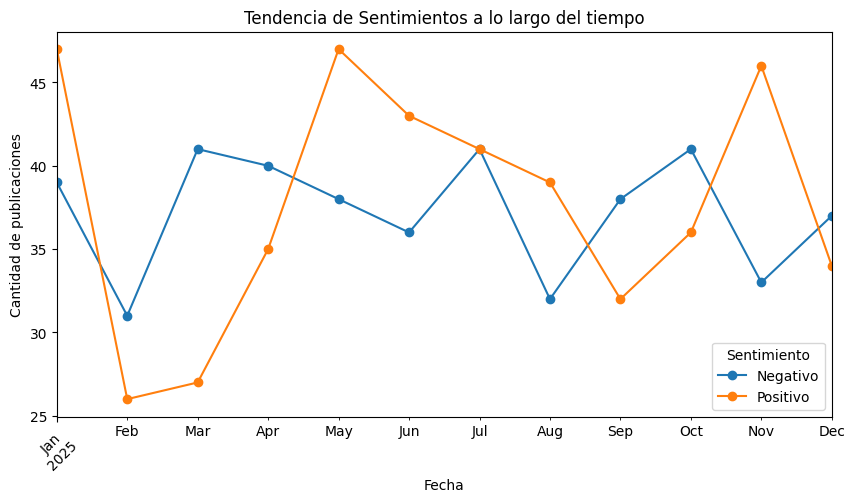

In [48]:
#----------------- Tendencias en Facebook-----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Cargar los datos (Asegúrate de que DFFB2 ya está cargado en tu entorno)
DFFB2['fecha'] = pd.to_datetime(DFFB2['fecha'])  # Convertir fechas a formato datetime
DFFB2['año_mes'] = DFFB2['fecha'].dt.to_period('M')  # Agrupar por mes

# ---------------------- Tendencia de Sentimientos a lo largo del tiempo ----------------------
tendencia_sentimiento = DFFB2.groupby(['año_mes', 'Sentimiento']).size().unstack()

plt.figure(figsize=(10, 5))
tendencia_sentimiento.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Tendencia de Sentimientos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de publicaciones")
plt.legend(title="Sentimiento")
plt.xticks(rotation=45)
plt.show()

In [45]:
DFIN2 = DFIN[['Texto_Procesado', 'Sentimiento', 'fecha']]

<ipython-input-49-c90e33056ac3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFIN2['fecha'] = pd.to_datetime(DFFB2['fecha'])  # Convertir fechas a formato datetime
<ipython-input-49-c90e33056ac3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFIN2['año_mes'] = DFIN2['fecha'].dt.to_period('M')  # Agrupar por mes


<Figure size 1000x500 with 0 Axes>

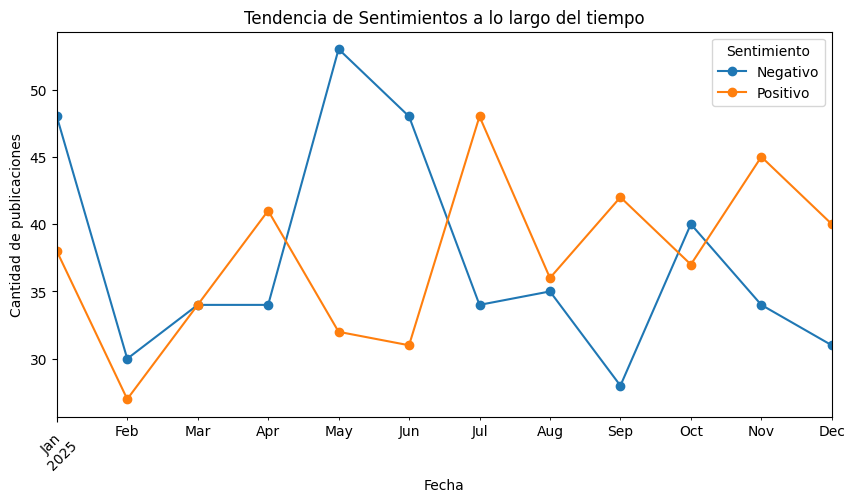

In [49]:
#----------------- Tendencias en Intagram-----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# Cargar los datos (Asegúrate de que DFFB2 ya está cargado en tu entorno)
DFIN2['fecha'] = pd.to_datetime(DFFB2['fecha'])  # Convertir fechas a formato datetime
DFIN2['año_mes'] = DFIN2['fecha'].dt.to_period('M')  # Agrupar por mes

# ---------------------- Tendencia de Sentimientos a lo largo del tiempo ----------------------
tendencia_sentimiento = DFIN2.groupby(['año_mes', 'Sentimiento']).size().unstack()

plt.figure(figsize=(10, 5))
tendencia_sentimiento.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Tendencia de Sentimientos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de publicaciones")
plt.legend(title="Sentimiento")
plt.xticks(rotation=45)
plt.show()

In [47]:
DFX2 = DFX[['Texto_Procesado', 'Sentimiento', 'fecha']]

<ipython-input-50-3a49ec36391b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFX2['fecha'] = pd.to_datetime(DFX2['fecha'])  # Convertir fechas a formato datetime
<ipython-input-50-3a49ec36391b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFX2['año_mes'] = DFX2['fecha'].dt.to_period('M')  # Agrupar por mes


<Figure size 1000x500 with 0 Axes>

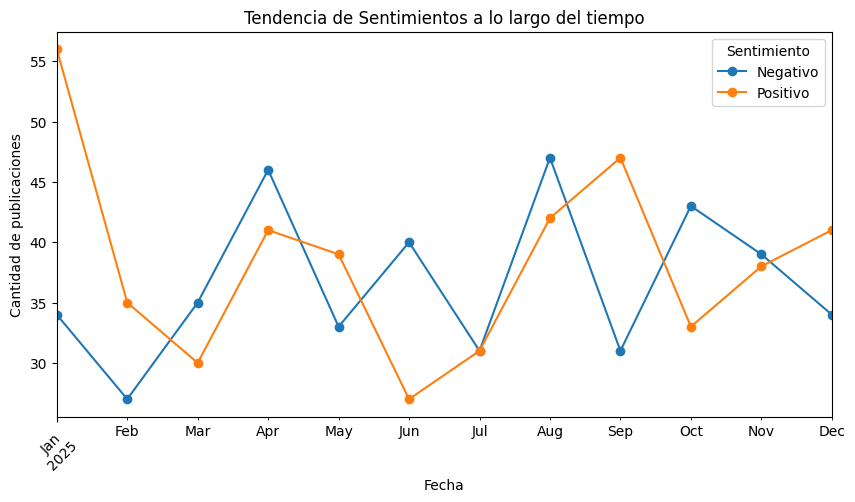

In [50]:
#----------------- Tendencias en X-----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Cargar los datos
DFX2['fecha'] = pd.to_datetime(DFX2['fecha'])  # Convertir fechas a formato datetime
DFX2['año_mes'] = DFX2['fecha'].dt.to_period('M')  # Agrupar por mes

# ---------------------- Tendencia de Sentimientos a lo largo del tiempo ----------------------
tendencia_sentimiento = DFX2.groupby(['año_mes', 'Sentimiento']).size().unstack()

plt.figure(figsize=(10, 5))
tendencia_sentimiento.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Tendencia de Sentimientos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de publicaciones")
plt.legend(title="Sentimiento")
plt.xticks(rotation=45)
plt.show()